In [120]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusting configuration for later plots

# Importing data
df = pd.read_csv(r'/Users/shivpatel/Desktop/Projects/movies.csv')

#Looking at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [121]:
# Checking for any missing data using a for loop

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [122]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [123]:
# Multiple columns appear to have null values, they must be removed
# Replacing the NaN values in the score column with the mean of the column
mean_s = df["score"].mean()
# print(mean_s)
df["score"].fillna(mean_s, inplace = True)

#Replacing NaN values in the votes column with the mean of the votes column
# df["votes"].unique()
mean_v = df["votes"].mean()
# print(mean_v)
df["votes"].fillna(mean_v, inplace = True)

#Replacing NaN values in the writer Column
df["writer"].unique()
df["writer"].fillna("Unknown Writer", inplace = True)

#Replacing NaN values in the star Column
df["star"].unique()
df["star"].fillna("Unknown Star", inplace = True)

#Replacing NaN values in the country column
df["country"].unique()
df["country"].fillna("Unknown Country", inplace = True)

#Replacing NaN values in the budget column with the mean of the column
mean_b = df["budget"].mean()
df["budget"].fillna(mean_b, inplace = True)

#Replacing NaN values in the gross column with the mean of the column
mean_g = df["gross"].mean()
df["gross"].fillna(mean_g, inplace = True)

#Replacing NaN values in the company Column
df["company"].unique()
df["company"].fillna("Unknown Company", inplace = True)

#Replacing NaN values in the runtime column with the mean of the column
mean_r = df["runtime"].mean()
df["runtime"].fillna(mean_r, inplace = True)

# Deleting rows with NaN values in released column
df.dropna(subset=['released'], inplace=True)
df.dropna(subset=['rating'], inplace=True)

#Splitting the released Column into date_released and country_released
df[["release_date", "release_country"]] = df["released"].str.split("(", expand = True)
df["release_country"] = df["release_country"].str[:-1]

df.isnull().sum()


name               0
rating             0
genre              0
year               0
released           0
score              0
votes              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
release_date       0
release_country    0
dtype: int64

In [124]:
# Checking data types
df.dtypes

name                object
rating              object
genre               object
year                 int64
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
release_date        object
release_country     object
dtype: object

In [125]:
# Changing column datatypes
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['score'] = df['score'].astype('int64')
df['votes'] = df['votes'].astype('int64')



In [126]:
# Creating correct year column, as some 'year' column values did not match with the 'released' values
df['year_correct'] = df['release_date'].astype(str).str[-5:]


In [127]:
# Ordering by gross
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [128]:
pd.set_option('display.max_rows', None)

In [129]:
# Dropping duplicates

df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009",United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019",United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997",United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015",United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018",United States,2018


Text(0, 0.5, 'Budget for Film')

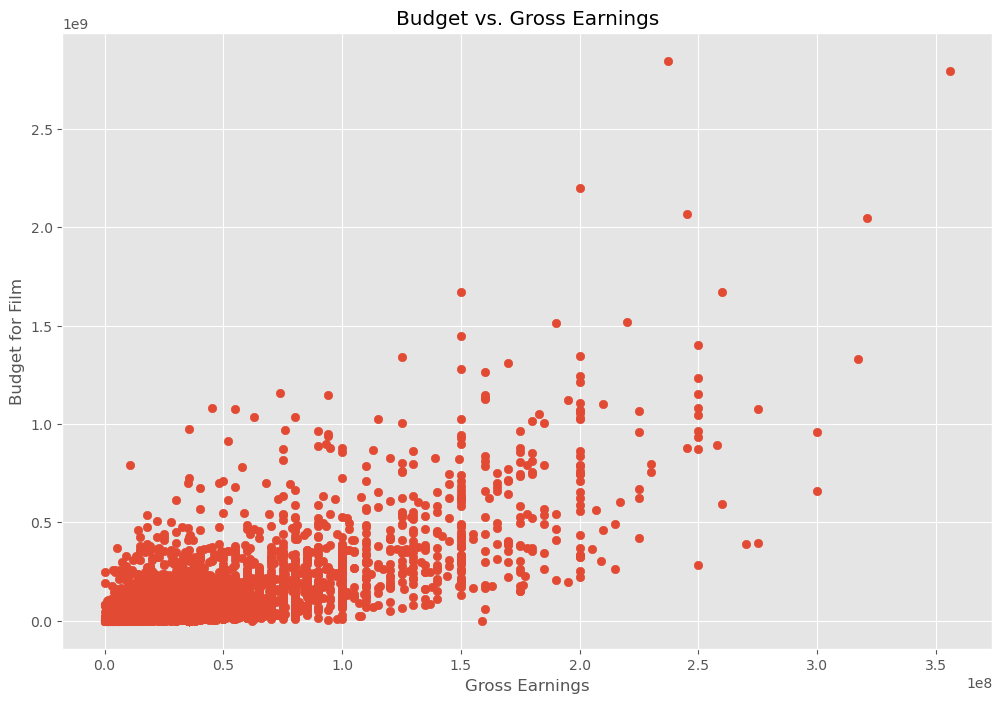

In [130]:
# Scatterplot with budget vs gross, to visualize correlation

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

<Axes: xlabel='budget', ylabel='gross'>

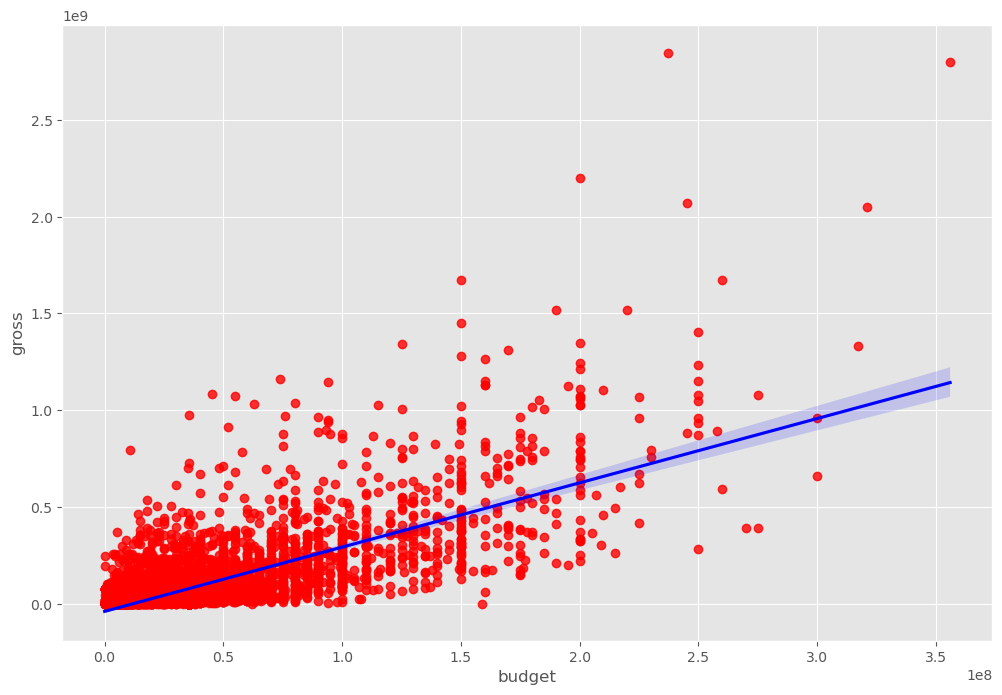

In [131]:
# Regression plot of budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [132]:
df.corr(numeric_only=True, method='pearson') # Defaults to pearson method without specifying, can use kendall and spearman as well

# Shows a high correlation between budget and gross, as well as votes and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.102850,0.226978,0.268733,0.254455,0.121517
score,0.102850,1.000000,0.396112,0.059598,0.176423,0.384472
votes,0.226978,0.396112,1.000000,0.421201,0.629322,0.309651
budget,0.268733,0.059598,0.421201,1.000000,0.712438,0.265781
gross,0.254455,0.176423,0.629322,0.712438,1.000000,0.241883
runtime,0.121517,0.384472,0.309651,0.265781,0.241883,1.000000


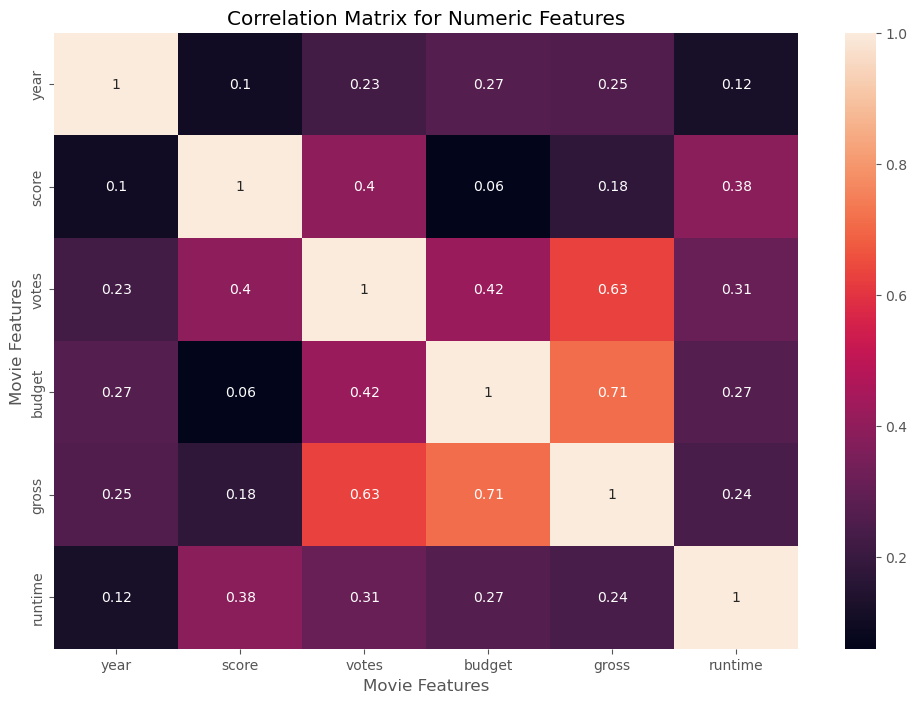

In [133]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [134]:
# Converting categorical columns into numerical codes
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year_correct
5445,528,5,0,2009,690,7,1100000,1139,1759,2289,55,237000000,2847246203,2212,162.0,604,55,29
7445,530,5,0,2019,182,8,903000,160,732,2198,55,356000000,2797501328,1575,181.0,152,55,39
3045,6825,5,6,1997,698,7,1100000,1139,1759,1565,55,200000000,2201647264,2212,194.0,610,55,17
6663,5085,5,0,2015,692,7,876000,1109,2522,509,55,245000000,2069521700,1509,138.0,606,55,35
7244,531,5,0,2018,191,8,897000,160,732,2198,55,321000000,2048359754,1575,149.0,160,55,38
7480,6127,4,2,2019,1470,6,222000,1436,1898,659,55,260000000,1670727580,2275,118.0,1293,55,39
6653,2942,5,0,2015,1686,7,593000,507,3529,424,55,150000000,1670516444,2240,124.0,1495,55,35
6043,5439,5,0,2012,2446,8,1300000,1497,2290,2198,55,220000000,1518815515,1575,143.0,2153,55,32
6646,2126,5,0,2015,219,7,370000,1172,696,2669,55,190000000,1515341399,2240,137.0,186,55,35
7494,2112,4,2,2019,2646,6,148000,425,1929,1498,55,150000000,1450026933,2274,103.0,2323,55,39


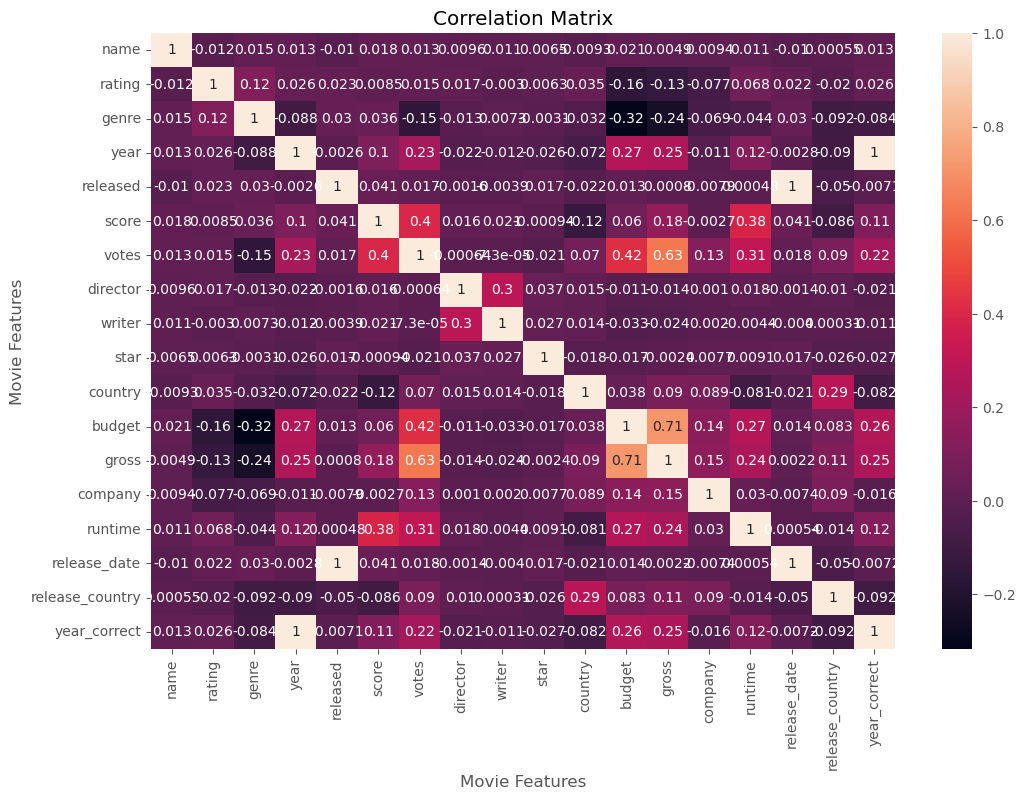

In [135]:
# Creating heatmap with inclusion of categorical columns

corr_matrix_numerized = df_numerized.corr()

sns.heatmap(correlation_matrix_numerized, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#

In [136]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year_correct
name,1.000000,-0.012333,0.014887,0.013384,-0.010298,0.017693,0.013126,0.009631,0.010795,0.006454,-0.009350,0.020889,0.004948,0.009397,0.011380,-0.010243,0.000553,0.012597
rating,-0.012333,1.000000,0.117889,0.026003,0.023307,0.008493,0.015303,0.017122,-0.002992,0.006259,0.034675,-0.155556,-0.128940,-0.076886,0.067572,0.022449,-0.019557,0.026175
genre,0.014887,0.117889,1.000000,-0.087718,0.030415,0.035591,-0.148217,-0.013443,0.007320,-0.003126,-0.031640,-0.316636,-0.238240,-0.068778,-0.044437,0.029642,-0.092360,-0.084109
year,0.013384,0.026003,-0.087718,1.000000,-0.002633,0.102850,0.226978,-0.021951,-0.011751,-0.026490,-0.071900,0.268733,0.254455,-0.011037,0.121517,-0.002758,-0.089576,0.997474
released,-0.010298,0.023307,0.030415,-0.002633,1.000000,0.040858,0.016790,-0.001628,-0.003915,0.017474,-0.021787,0.013005,0.000800,-0.007875,0.000476,0.999913,-0.050008,-0.007133
score,0.017693,0.008493,0.035591,0.102850,0.040858,1.000000,0.396112,0.015689,0.020529,-0.000940,-0.123162,0.059598,0.176423,-0.002703,0.384472,0.040971,-0.086477,0.110066
votes,0.013126,0.015303,-0.148217,0.226978,0.016790,0.396112,1.000000,-0.000640,-0.000073,-0.020642,0.069555,0.421201,0.629322,0.128833,0.309651,0.017746,0.089959,0.222418
director,0.009631,0.017122,-0.013443,-0.021951,-0.001628,0.015689,-0.000640,1.000000,0.297246,0.037426,0.014547,-0.010518,-0.013907,0.001002,0.017681,-0.001437,0.009976,-0.021279
writer,0.010795,-0.002992,0.007320,-0.011751,-0.003915,0.020529,-0.000073,0.297246,1.000000,0.027438,0.014263,-0.033289,-0.023652,0.001975,-0.004378,-0.003955,0.000306,-0.011437
star,0.006454,0.006259,-0.003126,-0.026490,0.017474,-0.000940,-0.020642,0.037426,0.027438,1.000000,-0.017570,-0.017018,-0.002401,0.007703,0.009062,0.017316,-0.026145,-0.026876


In [137]:
# Unstacking, 

corr_pairs = corr_matrix_numerized.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.012333
                 genre              0.014887
                 year               0.013384
                 released          -0.010298
                 score              0.017693
                 votes              0.013126
                 director           0.009631
                 writer             0.010795
                 star               0.006454
                 country           -0.009350
                 budget             0.020889
                 gross              0.004948
                 company            0.009397
                 runtime            0.011380
                 release_date      -0.010243
                 release_country    0.000553
                 year_correct       0.012597
rating           name              -0.012333
                 rating             1.000000
                 genre              0.117889
                 year               0.026003
          

In [138]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget           genre             -0.316636
genre            budget            -0.316636
                 gross             -0.238240
gross            genre             -0.238240
rating           budget            -0.155556
budget           rating            -0.155556
votes            genre             -0.148217
genre            votes             -0.148217
gross            rating            -0.128940
rating           gross             -0.128940
country          score             -0.123162
score            country           -0.123162
genre            release_country   -0.092360
release_country  genre             -0.092360
year_correct     release_country   -0.092297
release_country  year_correct      -0.092297
                 year              -0.089576
year             release_country   -0.089576
                 genre             -0.087718
genre            year              -0.087718
score            release_country   -0.086477
release_country  score             -0.086477
genre     

In [139]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes            gross              0.629322
gross            votes              0.629322
                 budget             0.712438
budget           gross              0.712438
year             year_correct       0.997474
year_correct     year               0.997474
released         release_date       0.999913
release_date     released           0.999913
name             name               1.000000
release_date     release_date       1.000000
rating           rating             1.000000
genre            genre              1.000000
year             year               1.000000
released         released           1.000000
score            score              1.000000
votes            votes              1.000000
release_country  release_country    1.000000
director         director           1.000000
star             star               1.000000
country          country            1.000000
budget           budget             1.000000
gross            gross              1.000000
company   

In [140]:
# Votes and budget have the highest correlation to gross earnings